In [9]:
from sklearn.decomposition import PCA
from scipy.stats import pearsonr
import numpy as np

# データの定義
HV_D1_L = [4.5, 29.6, 18.0, 12.8, 14.3, 15.7, 6.1, 11.5, 14.2, 18.1, 12.5, 16.8, 17.8, 5.5]
HV_D2_L = [2.4, 29.5, 15.3, 9.8, 13.1, 16.0, 6.9, 11.5, 13.7, 18.1, 14.2, 13.0, 18.2, 7.6]

# データをNumpy配列に変換
data = np.array([HV_D1_L, HV_D2_L]).T

# PCAの実行
pca = PCA(n_components=2)
pca.fit(data)

# 第一主成分軸の寄与率を計算
contribution_rate = pca.explained_variance_ratio_[0]

# 相関係数とその二乗を計算
correlation, _ = pearsonr(HV_D1_L, HV_D2_L)
squared_correlation = correlation ** 2

contribution_rate, squared_correlation

(0.9810735472371479, 0.9257236029428833)

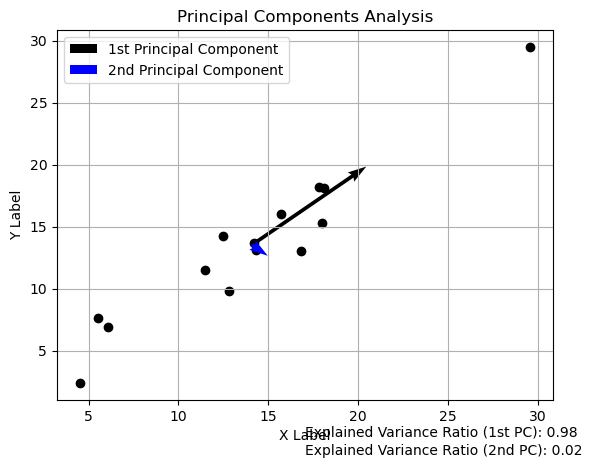

In [11]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_principal_components(data1, data2):
    # データを結合して行列に変換
    data = np.array([data1, data2]).T
    
    # PCAを実行
    pca = PCA(n_components=2)
    pca.fit(data)
    
    # 主成分軸方向の単位ベクトル（固有ベクトル）
    loadings = pca.components_
    
    # 固有値から主成分軸の長さを計算
    lengths = np.sqrt(pca.explained_variance_)
    
    # 寄与率を取得
    explained_variance_ratio = pca.explained_variance_ratio_
    
    # データ点の散布図をプロット
    plt.scatter(data1, data2, c='black', marker='o')
    
    # 第一主成分軸を描画（黒色）
    plt.quiver(pca.mean_[0], pca.mean_[1], loadings[0, 0] * lengths[0], loadings[0, 1] * lengths[0], angles='xy', scale_units='xy', scale=1, color='black', label='1st Principal Component')
    
    # 第二主成分軸を描画（青色）
    plt.quiver(pca.mean_[0], pca.mean_[1], loadings[1, 0] * lengths[1], loadings[1, 1] * lengths[1], angles='xy', scale_units='xy', scale=1, color='blue', label='2nd Principal Component')
    
    # プロットの設定（タイトル、軸ラベルなど）
    plt.title('Principal Components Analysis')
    plt.xlabel('X Label')
    plt.ylabel('Y Label')
    
    # グリッドを表示
    plt.grid(True)
    
    # 寄与率を表示
    plt.text(0.5, -0.1, f'Explained Variance Ratio (1st PC): {explained_variance_ratio[0]:.2f}', transform=plt.gca().transAxes)
    plt.text(0.5, -0.15, f'Explained Variance Ratio (2nd PC): {explained_variance_ratio[1]:.2f}', transform=plt.gca().transAxes)
    
    # 凡例を表示
    plt.legend()
    
    # プロットを表示
    plt.show()



# データを準備（data1とdata2は適切に設定する必要があります）
data1 = np.array([4.5, 29.6, 18.0, 12.8, 14.3, 15.7, 6.1, 11.5, 14.2, 18.1, 12.5, 16.8, 17.8, 5.5])
data2 = np.array([2.4, 29.5, 15.3, 9.8, 13.1, 16.0, 6.9, 11.5, 13.7, 18.1, 14.2, 13.0, 18.2, 7.6])

# 主成分軸を描画したプロットを生成
plot_principal_components(data1, data2)
